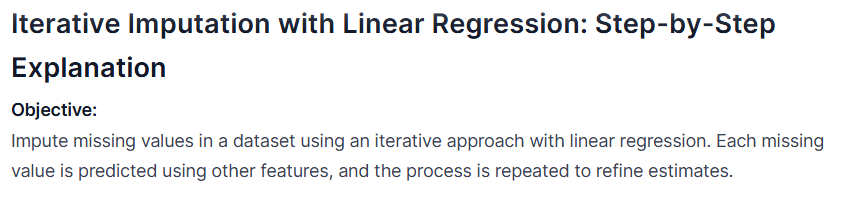

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a custom dataset
data = {
    'X1': [5, 7, np.nan, 8, 6],
    'X2': [20, np.nan, 15, 10, 25],
    'X3': [100, 150, 200, np.nan, 250]
}

df = pd.DataFrame(data)
print("Original Dataset with Missing Values:")
print(df)

Original Dataset with Missing Values:
    X1    X2     X3
0  5.0  20.0  100.0
1  7.0   NaN  150.0
2  NaN  15.0  200.0
3  8.0  10.0    NaN
4  6.0  25.0  250.0


In [2]:
df0 = df.fillna(df.mean())
print("\nDataset After Initial Imputation with Mean (df0):")
print(df0)


Dataset After Initial Imputation with Mean (df0):
    X1    X2     X3
0  5.0  20.0  100.0
1  7.0  17.5  150.0
2  6.5  15.0  200.0
3  8.0  10.0  175.0
4  6.0  25.0  250.0


In [3]:
df1 = df0.copy()
df1.iloc[2, 0] = np.nan  # Reintroduce NaN for X1 in Row 3

X = df1.iloc[[0, 1, 3, 4], 1:3]  # X2 and X3
y = df1.iloc[[0, 1, 3, 4], 0]    # X1
lr = LinearRegression()
lr.fit(X, y)
prediction = lr.predict([[15.0, 200.0]])  # Row 3's features
df1.iloc[2, 0] = prediction[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
df1.iloc[1, 1] = np.nan  # Reintroduce NaN for X2 in Row 2

X = df1.iloc[[0, 2, 3, 4], [0, 2]]  # X1 and X3
y = df1.iloc[[0, 2, 3, 4], 1]       # X2

lr.fit(X, y)
prediction = lr.predict([[7.0, 150.0]])  # Row 2's features
df1.iloc[1, 1] = prediction[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
df1.iloc[3, 2] = np.nan  # Reintroduce NaN for X3 in Row 4

X = df1.iloc[[0, 1, 2, 4], 0:2]  # X1 and X2
y = df1.iloc[[0, 1, 2, 4], 2]    # X3
print(X)
print(y)
lr.fit(X, y)
prediction = lr.predict([[8.0, 10.0]])  # Row 4's features
df1.iloc[3, 2] = prediction[0]

    X1         X2
0  5.0  20.000000
1  7.0  13.577763
2  7.5  15.000000
4  6.0  25.000000
0    100.0
1    150.0
2    200.0
4    250.0
Name: X3, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


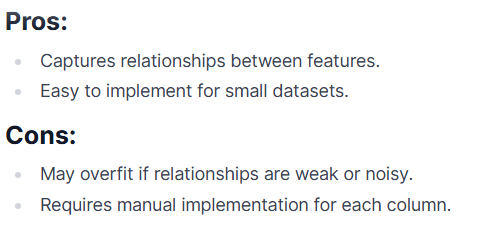